In [1]:
import os
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rcParams
import seaborn as sns

In [ ]:
# check the scale for hyperspectral imaging
def read_image(fn):
    with h5py.File(fn) as f:
        print('Read metadata about excitation/emission lambdas')
        keys = ['excitationWavelength', 'emission']
        wls = {key: [] for key in keys}
        for key in keys:
            tmp = f['HAC_Image']['imageStruct']['protocol']['channel'][key]
            n_colors = tmp.size
            for i in range(n_colors):
                tmpi = f[f[tmp[i, 0]][0, 0]][:, 0]
                wl = int(tmpi.astype(dtype=np.uint8).tobytes().decode())
                wls[key].append(wl)
        wls['combo'] = []
        for i in range(n_colors):
            wls['combo'].append(
                (wls['excitationWavelength'][i], wls['emission'][i]),
                )

        print('Read image data')
        img = f['HAC_Image']['imageStruct']['data'][:, :, :]
    return {
        'data': img,
        'wavelengths': wls['combo'],
        'image': os.path.basename(fn).split('.')[0],
    }



Image size of 40x magnificance: 0.331 um/pixel
Length of image: 339.08276 um

This is the 0 cell M5_S37


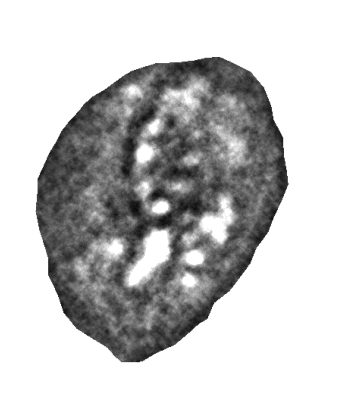

In [5]:
# Panel 1 of figure 2
# M5_S37 as the example

npz_fdn = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
save_path = '/home/yike/phd/cancer_cells_img_seq/docs/hyperspectral_sequencing_ewa/figures/figure1/'

fns = ['M5_S37.npz']

for i, fn in enumerate(fns):

    image = np.load(npz_fdn + fn)
    sample = fn.split('.')[0]
    
    print(f'This is the {i} cell {sample}')
    fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=300)    
    rcParams['pdf.fonttype'] = 42
    
    file = image.files[2]
    vmax = 10000
    img = image[file] * image['new_segmentation']
    img[~ image['new_segmentation']] = vmax
    ax.imshow(img, vmax=vmax, cmap='gray') # 
    ax.axis('off')
#     plt.savefig(save_path + sample + '_2.png', bbox_inches='tight', dpi=300)
#     plt.savefig(save_path + sample + '_2.pdf', bbox_inches='tight', dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 367.5, 448.5, -0.5)

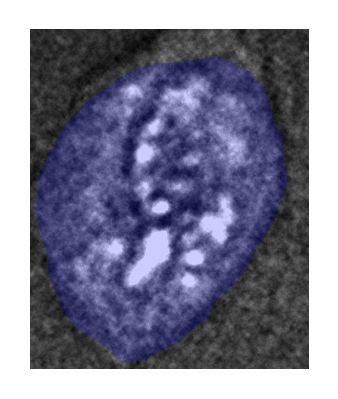

In [119]:
# Panel 1 of figure 2
# M5_S37 as the example

npz_fdn = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
save_path = '/home/yike/phd/cancer_cells_img_seq/docs/hyperspectral_sequencing_ewa/figures/figure1/'

fn = 'M5_S37.npz'

image = np.load(npz_fdn + fn)
sample = fn.split('.')[0]

fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=300)    
rcParams['pdf.fonttype'] = 42

file = image.files[2]
vmax = 10000

# mask_o = image['new_segmentation'].copy()
# mask = image['new_segmentation'].copy()
# mask[mask_o] = 0
# mask[~ mask_o] = 1

mask_o = image['new_segmentation'].copy()
mask = np.zeros(list(mask_o.shape) + [4])
mask[:, :, 2][mask_o] = 255
mask[:, :, 3][mask_o] = 0.2

ax.imshow(image[file], vmax=vmax,cmap='gray') # 
ax.imshow(mask)
ax.axis('off')

#     plt.savefig(save_path + sample + '_2.png', bbox_inches='tight', dpi=300)
#     plt.savefig(save_path + sample + '_2.pdf', bbox_inches='tight', dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


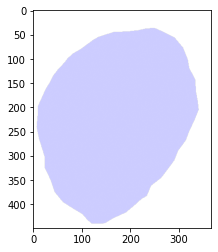

In [120]:
mask_o = image['new_segmentation'].copy()
mask = np.zeros(list(mask_o.shape) + [4])
mask[:, :, 2][mask_o] = 255
mask[:, :, 3][mask_o] = 0.2
plt.imshow(mask)